In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

train_set = torchvision.datasets.FashionMNIST(root = ".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
torch.manual_seed(0)

torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

Epoch 1/30 => Train Loss: 986.8337, Train Acc: 80.20%, Test Acc: 84.34%
Epoch 2/30 => Train Loss: 603.3089, Train Acc: 88.06%, Test Acc: 87.77%
Epoch 3/30 => Train Loss: 513.5808, Train Acc: 89.81%, Test Acc: 89.05%
Epoch 4/30 => Train Loss: 458.4720, Train Acc: 90.87%, Test Acc: 89.80%
Epoch 5/30 => Train Loss: 411.6038, Train Acc: 91.72%, Test Acc: 90.06%
Epoch 6/30 => Train Loss: 372.8328, Train Acc: 92.45%, Test Acc: 90.27%
Epoch 7/30 => Train Loss: 336.3317, Train Acc: 93.20%, Test Acc: 90.74%
Epoch 8/30 => Train Loss: 299.6888, Train Acc: 93.97%, Test Acc: 90.46%
Epoch 9/30 => Train Loss: 272.1626, Train Acc: 94.44%, Test Acc: 91.07%
Epoch 10/30 => Train Loss: 244.1201, Train Acc: 95.01%, Test Acc: 90.91%
Epoch 11/30 => Train Loss: 220.8897, Train Acc: 95.49%, Test Acc: 90.61%
Epoch 12/30 => Train Loss: 206.3956, Train Acc: 95.68%, Test Acc: 91.12%
Epoch 13/30 => Train Loss: 174.6619, Train Acc: 96.50%, Test Acc: 90.99%
Epoch 14/30 => Train Loss: 159.9743, Train Acc: 96.72%, Test

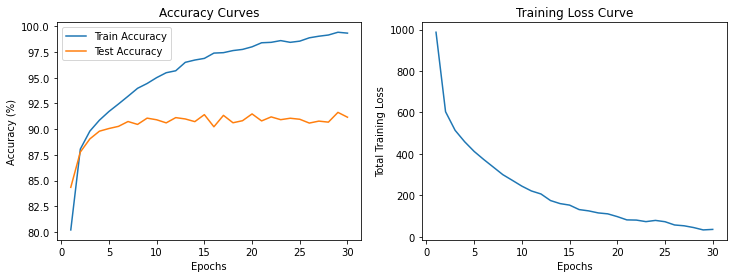

In [2]:
class CustomCNN(nn.Module):
    def __init__(self):
        # Convolutional layers
        self.conv1_layer = nn.Conv2d(1, 32, kernel_size=5, stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2_layer = nn.Conv2d(32, 64, kernel_size=5, stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(1024, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 256)
        self.relu4 = nn.ReLU()
        self.output_layer = nn.Linear(256, 10)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1_layer(x)))
        x = self.maxpool2(self.relu2(self.conv2_layer(x)))
        x = x.view(-1, 1024)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.output_layer(x)
        return x
    
model = CustomCNN()

# initialise weights using Xavier initialisation
def initialise_weights(m):
    if type(m) == nn.Conv2d or type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

model.apply(initialise_weights)


# Cross-entropy loss and SGD optimizer
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=0.1)

def train_model(model, train_loader, criterion, optimiser, num_epochs=30):
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimiser.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_accuracy = 100. * correct_train / total_train
        train_loss_list.append(total_loss)

        model.eval()
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total_test += labels.size(0)
                correct_test += predicted.eq(labels).sum().item()

        test_accuracy = 100. * correct_test / total_test
        train_acc_list.append(train_accuracy)
        test_acc_list.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} => Train Loss: {total_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")

    return train_loss_list, train_acc_list, test_acc_list

train_loss_list, train_acc_list, test_acc_list = train_model(model, train_loader, criterion, optimiser)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 31), train_acc_list, label='Train Accuracy')
plt.plot(range(1, 31), test_acc_list, label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 31), train_loss_list, label='Train Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Total Training Loss')
plt.show()

In [3]:
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        # Convolutional layers
        self.conv1_layer = nn.Conv2d(1, 32, kernel_size=5, stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2_layer = nn.Conv2d(32, 64, kernel_size=5, stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(1024, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 256)
        self.relu4 = nn.ReLU()
        self.output_layer = nn.Linear(256, 10)

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.maxpool1(self.relu1(self.conv1_layer(x)))
        x = self.maxpool2(self.relu2(self.conv2_layer(x)))
        x = x.view(-1, 1024)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.output_layer(x)
        return x

def train_model(model, train_loader, test_loader, activation_function, num_epochs=30, learning_rate=0.1):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        total_loss = 0.0
        correct_train = 0
        total_train = 0
        # Iterate over batches in the training data
        for inputs, labels in train_loader:
            optimiser.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_accuracy = 100. * correct_train / total_train
        print(f"Epoch {epoch+1}/{num_epochs} => Train Loss: {total_loss:.4f}, Train Acc: {train_accuracy:.2f}%")

    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_accuracy = 100. * correct_test / total_test
    return train_accuracy, test_accuracy

# Function to run different activation functions
def experiment(activation_function):
    model = CustomCNN(activation_function)

    train_accuracy, test_accuracy = train_model(model, train_loader, test_loader, activation_function)

    return train_accuracy, test_accuracy

# Define data loaders
train_set = torchvision.datasets.FashionMNIST(root=".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root=".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

# Run experiments with different activation functions
activation_functions = [nn.Tanh, nn.Sigmoid, nn.ELU]

for activation_function in activation_functions:
    train_acc, test_acc = experiment(activation_function)
    print(f"\nActivation Function: {activation_function.__name__}")
    print(f"Final Train Accuracy: {train_acc:.2f}%")
    print(f"Final Test Accuracy: {test_acc:.2f}%")
    print("-" * 40)

Epoch 1/30 => Train Loss: 983.7664, Train Acc: 80.51%
Epoch 2/30 => Train Loss: 640.5693, Train Acc: 87.52%
Epoch 3/30 => Train Loss: 545.2497, Train Acc: 89.30%
Epoch 4/30 => Train Loss: 487.7806, Train Acc: 90.40%
Epoch 5/30 => Train Loss: 438.1642, Train Acc: 91.41%
Epoch 6/30 => Train Loss: 398.5775, Train Acc: 92.11%
Epoch 7/30 => Train Loss: 363.1329, Train Acc: 92.80%
Epoch 8/30 => Train Loss: 327.1764, Train Acc: 93.49%
Epoch 9/30 => Train Loss: 298.1754, Train Acc: 94.12%
Epoch 10/30 => Train Loss: 267.3635, Train Acc: 94.72%
Epoch 11/30 => Train Loss: 240.7250, Train Acc: 95.20%
Epoch 12/30 => Train Loss: 215.3814, Train Acc: 95.71%
Epoch 13/30 => Train Loss: 191.0325, Train Acc: 96.24%
Epoch 14/30 => Train Loss: 166.4584, Train Acc: 96.73%
Epoch 15/30 => Train Loss: 150.1484, Train Acc: 97.00%
Epoch 16/30 => Train Loss: 129.4598, Train Acc: 97.44%
Epoch 17/30 => Train Loss: 117.2431, Train Acc: 97.72%
Epoch 18/30 => Train Loss: 100.7298, Train Acc: 98.02%
Epoch 19/30 => Trai

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

class CustomCNN(nn.Module):
    def __init__(self):
        # Convolutional layers
        self.conv1_layer = nn.Conv2d(1, 32, kernel_size=5, stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2_layer = nn.Conv2d(32, 64, kernel_size=5, stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(1024, 1024)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(1024, 256)
        self.relu4 = nn.ReLU()
        self.output_layer = nn.Linear(256, 10)

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.maxpool1(self.relu1(self.conv1_layer(x)))
        x = self.maxpool2(self.relu2(self.conv2_layer(x)))
        x = x.view(-1, 1024)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.output_layer(x)
        return x

def train_model(model, train_loader, test_loader, learning_rate, num_epochs=30):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimiser = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        total_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimiser.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_accuracy = 100. * correct_train / total_train
        print(f"Epoch {epoch+1}/{num_epochs} => Train Loss: {total_loss:.4f}, Train Acc: {train_accuracy:.2f}%")

    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    test_accuracy = 100. * correct_test / total_test
    return total_loss, train_accuracy, test_accuracy

def learning_rate_experiment(learning_rate):
    model = CustomCNN()
    train_loss, train_acc, test_acc = train_model(model, train_loader, test_loader, learning_rate)
    return train_loss, train_acc, test_acc

def dropout_function(dropout_rate):
    model = CustomCNN(dropout_rate)
    train_loss, train_acc, test_acc = train_model(model, train_loader, test_loader, learning_rate=0.1)
    return train_loss, train_acc, test_acc

train_set = torchvision.datasets.FashionMNIST(root=".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root=".", train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

# Q4
learning_rates = [0.001, 0.1, 0.5, 1, 10]
for lr in learning_rates:
    train_loss, train_acc, test_acc = learning_rate_experiment(lr)
    print(f"\nLearning Rate: {lr}")
    print(f"Final Train Loss: {train_loss:.4f}")
    print(f"Final Train Accuracy: {train_acc:.2f}%")
    print(f"Final Test Accuracy: {test_acc:.2f}%")
    print("-" * 40)

# Q5
dropout_rate = 0.3
train_loss, train_acc, test_acc = dropout_function(dropout_rate)
print("\nDropout Experiment:")
print(f"Final Train Loss: {train_loss:.4f}")
print(f"Final Train Accuracy: {train_acc:.2f}%")
print(f"Final Test Accuracy: {test_acc:.2f}%")


Epoch 1/30 => Train Loss: 4287.6520, Train Acc: 12.64%
Epoch 2/30 => Train Loss: 3997.7669, Train Acc: 40.20%
Epoch 3/30 => Train Loss: 2311.3218, Train Acc: 59.23%
Epoch 4/30 => Train Loss: 1706.0627, Train Acc: 66.14%
Epoch 5/30 => Train Loss: 1523.5691, Train Acc: 69.78%
Epoch 6/30 => Train Loss: 1404.7268, Train Acc: 71.96%
Epoch 7/30 => Train Loss: 1329.6781, Train Acc: 73.05%
Epoch 8/30 => Train Loss: 1284.5467, Train Acc: 73.95%
Epoch 9/30 => Train Loss: 1247.2160, Train Acc: 74.68%
Epoch 10/30 => Train Loss: 1212.9833, Train Acc: 75.56%
Epoch 11/30 => Train Loss: 1182.9207, Train Acc: 76.21%
Epoch 12/30 => Train Loss: 1153.9931, Train Acc: 77.06%
Epoch 13/30 => Train Loss: 1127.0874, Train Acc: 77.44%
Epoch 14/30 => Train Loss: 1101.0643, Train Acc: 78.13%
Epoch 15/30 => Train Loss: 1075.6155, Train Acc: 78.63%
Epoch 16/30 => Train Loss: 1052.8522, Train Acc: 79.22%
Epoch 17/30 => Train Loss: 1030.6440, Train Acc: 79.53%
Epoch 18/30 => Train Loss: 1010.1294, Train Acc: 80.13%
E

Epoch 19/30 => Train Loss: 4633.4744, Train Acc: 10.02%
Epoch 20/30 => Train Loss: 4632.5023, Train Acc: 10.02%
Epoch 21/30 => Train Loss: 4648.0344, Train Acc: 10.09%
Epoch 22/30 => Train Loss: 4646.9033, Train Acc: 9.90%
Epoch 23/30 => Train Loss: 4639.0221, Train Acc: 10.03%
Epoch 24/30 => Train Loss: 4641.1417, Train Acc: 9.89%
Epoch 25/30 => Train Loss: 4652.6049, Train Acc: 9.73%
Epoch 26/30 => Train Loss: 4629.1619, Train Acc: 10.14%
Epoch 27/30 => Train Loss: 4650.3100, Train Acc: 10.03%
Epoch 28/30 => Train Loss: 4634.5227, Train Acc: 9.96%
Epoch 29/30 => Train Loss: 4630.8640, Train Acc: 10.11%
Epoch 30/30 => Train Loss: 4639.9063, Train Acc: 9.84%

Learning Rate: 10
Final Train Loss: 4639.9063
Final Train Accuracy: 9.84%
Final Test Accuracy: 10.00%
----------------------------------------
Epoch 1/30 => Train Loss: 1193.6527, Train Acc: 75.81%
Epoch 2/30 => Train Loss: 664.7183, Train Acc: 87.03%
Epoch 3/30 => Train Loss: 555.7110, Train Acc: 89.15%
Epoch 4/30 => Train Loss: 